In [ ]:
#!jupyter nbconvert --to script A0Task2.ipynb 
# converts Jupyter notebook to python script 
# uncomment first line and run the cell to do so

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv('Data/train_in.csv', header=None).values
y_train = pd.read_csv('Data/train_out.csv', header=None).values.flatten()
X_test = pd.read_csv('Data/test_in.csv', header=None).values
y_test = pd.read_csv('Data/test_out.csv', header=None).values.flatten()
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1707, 256) (1707,)
Test shape: (1000, 256) (1000,)


In [4]:
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print("Train with bias shape:", X_train_bias.shape)
print("Test with bias shape:", X_test_bias.shape)

Train with bias shape: (1707, 257)
Test with bias shape: (1000, 257)


In [13]:
num_features = X_train_bias.shape[1]
num_classes = 10

In [6]:
def predict(X, W):
    scores = X @ W
    return np.argmax(scores, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [14]:
np.random.seed(123)
W = np.random.randn(num_features, num_classes) * 0.01

epochs = 100
lr = 0.01
train_acc = []
test_acc = []

for epoch in range(epochs):
    for i in range(X_train_bias.shape[0]):
        xi = X_train_bias[i]
        yi = y_train[i]
        scores = xi @ W
        pred = np.argmax(scores)
        if pred != yi:
            W[:, yi] += lr * xi
            W[:, pred] -= lr * xi
    
    train_pred = predict(X_train_bias, W)
    test_pred = predict(X_test_bias, W)
    train_acc.append(accuracy(y_train, train_pred))
    test_acc.append(accuracy(y_test, test_pred))
    print(f"Epoch {epoch+1}: Train Acc={train_acc[-1]:.4f}, Test Acc={test_acc[-1]:.4f}")

Epoch 1: Train Acc=0.8946, Test Acc=0.8200
Epoch 2: Train Acc=0.9520, Test Acc=0.8660
Epoch 3: Train Acc=0.9309, Test Acc=0.8370
Epoch 4: Train Acc=0.9397, Test Acc=0.8590
Epoch 5: Train Acc=0.9549, Test Acc=0.8510
Epoch 6: Train Acc=0.9631, Test Acc=0.8560
Epoch 7: Train Acc=0.9520, Test Acc=0.8470
Epoch 8: Train Acc=0.9402, Test Acc=0.8340
Epoch 9: Train Acc=0.9707, Test Acc=0.8580
Epoch 10: Train Acc=0.9649, Test Acc=0.8510
Epoch 11: Train Acc=0.9660, Test Acc=0.8560
Epoch 12: Train Acc=0.9818, Test Acc=0.8710
Epoch 13: Train Acc=0.9637, Test Acc=0.8510
Epoch 14: Train Acc=0.9777, Test Acc=0.8570
Epoch 15: Train Acc=0.9848, Test Acc=0.8660
Epoch 16: Train Acc=0.9965, Test Acc=0.8740
Epoch 17: Train Acc=0.9813, Test Acc=0.8640
Epoch 18: Train Acc=0.9602, Test Acc=0.8410
Epoch 19: Train Acc=0.9824, Test Acc=0.8630
Epoch 20: Train Acc=0.9906, Test Acc=0.8700
Epoch 21: Train Acc=0.9660, Test Acc=0.8500
Epoch 22: Train Acc=0.9830, Test Acc=0.8700
Epoch 23: Train Acc=0.9900, Test Acc=0.87

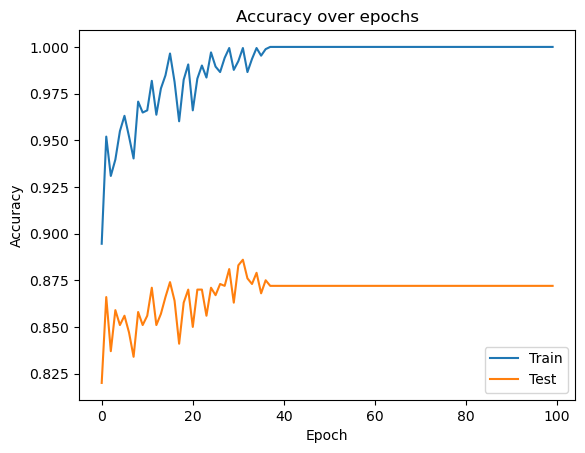

In [25]:
#plot train and test accuracy over epochs
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()